## Linear regresison from scratch

https://gluon.mxnet.io/chapter02_supervised-learning/linear-regression-scratch.html

In [1]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

In [2]:
def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

In [3]:
import numpy as np

In [4]:
x = np.random.randn(num_examples, num_inputs)
noise = .1 * np.random.randn(num_examples)
y = real_fn(x) + noise

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x.shape, y.shape

((10000, 2), (10000,))

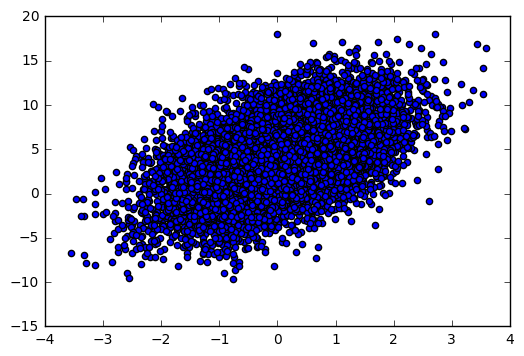

In [7]:
plt.scatter(x[:, 0], y)

In [8]:
def linear_regression(x, w, b):
    return np.dot(x, np.squeeze(w)) + b

In [9]:
def square_loss(yhat, y):
    return np.mean((yhat - y) ** 2)

In [10]:
def gradient(w, b, x, y):
    # obj func sum(G(w, b)) / N
    #   where G(w, b) = [(wx + b) - y].^2
    # DG(w, b) / dw
    #   = 2 * (wx + b - y) * D(wx + b - y) / dw
    #   = 2 * (wx + b - y) * x
    # DG(w, b) / db
    #   = 2 * (wx + b - y) * D(wx + b - y) / db
    #   = 2 * (wx + b - y)
    z = 2 * (np.dot(x, np.squeeze(w)) + b - y)
    #print([z.shape, x.shape, np.squeeze(w).shape])
    return np.mean(z[:, np.newaxis] * x, axis=0), np.mean(z)

In [11]:
def sgd_update(w, b, x, y, rate):
    grad_w, grad_b = gradient(w, b, x, y)
#     print(grad_w)
#     print(grad_b)
    w[:] = w - rate * grad_w[:, np.newaxis]
    b[:] = b - rate * grad_b
    return w, b

In [12]:
z = np.array(list(zip(x, y)))
np.random.shuffle(z)
z.size, z[0]

(20000,
 array([array([-1.56144224, -1.15531991]), 4.9250839105208293], dtype=object))

In [13]:
batch_size = 4
num_batches = num_examples / batch_size
batches = np.array_split(z, num_batches)
num_batches, batches[0]

(2500.0, array([[array([-1.56144224, -1.15531991]), 4.9250839105208293],
        [array([ 0.33823663,  0.97920301]), 1.5336772326642549],
        [array([-1.61536528,  0.3209968 ]), -0.043011495073274175],
        [array([-0.39120133,  1.28567172]), -1.0208506586462778]], dtype=object))

In [14]:
bx, by = zip(*batches[0])
bx, by = np.array(bx), np.array(by)

In [15]:
epochs = 10
learning_rate = .0001

In [16]:
w = np.random.randn(num_inputs, num_outputs)
b = np.random.randn(num_outputs)

In [17]:
for e in range(epochs):
    cumulative_loss = 0
    for batch in batches:
        bx, by = zip(*batch)
        bx, by = np.array(bx), np.array(by)
        yhat = linear_regression(bx, w, b)
        loss = square_loss(yhat, by)
        cumulative_loss += loss
        sgd_update(w, b, bx, by, learning_rate)
    print(cumulative_loss / num_batches)

21.3826753315
7.93758217887
2.95049813857
1.10068049578
0.414546486485
0.160048573798
0.0656532289974
0.0306424999177
0.0176580154234
0.0128429435927


In [18]:
w

array([[ 1.98253354],
       [-3.37872373]])

In [19]:
b

array([ 4.17024647])